# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
from ddpg_agent import Agent, ReplayBuffer
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher2.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(brain_name)

ReacherBrain


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
print(dir(env_info))
print(env_info.previous_vector_actions)

### 3. Test the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
actor_local_state = torch.load('agent_checkpoints/checkpoint_actor.pth')
critic_local_state = torch.load('agent_checkpoints/checkpoint_critic.pth')

BATCH_SIZE = 128
agent = Agent(state_size, action_size, BATCH_SIZE, 0, actor_local_dict=actor_local_state, critic_local_dict=critic_local_state)

Using  cpu


In [11]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # initialize timestep
while True:
#     # random example 
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1

    # test agent
    actions = [agent.act(states[0])]                # get first agents actions
    for i in range(1,num_agents):
        actions.append(agent.act(states[i]))        # get all other agents actions
    
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    t+=1
    if np.any(dones):                                  # exit loop if episode finished
        print('DONE', dones)
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print(t, 'STEPS')

DONE [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Total score (averaged over agents) this episode: 9.98049977691844
1001 STEPS


In [ ]:
print(actions[9])

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:

BATCH_SIZE = 128

# create agent
agent = Agent(state_size, action_size, BATCH_SIZE, 0)

# tried creating an RL agent per environment agent

# create replay buffer (single)
# replay_buff = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, 3)

# agents = []
# for i in range(num_agents):
#     agents.append(Agent(state_size, action_size, BATCH_SIZE, i, replay_buff))

Using  cpu


In [12]:

N_EPS = 400
T_MAX = 950 # default time limit in env is 1000

# try to implement multi-agent DDPG
def multi_ddpg(n_episodes=N_EPS, max_t=T_MAX, print_every=100):
    
    scores_deque = deque(maxlen=print_every)
    score_hist = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # turn train mode on for env
        states = env_info.vector_observations                 # get initial states
        
        agent.reset()
#         for i in range(num_agents):                         # reset all agents
#             agents[i].reset()

        scores = np.zeros(num_agents)                         # initialize the score (for each agent)
    
        for t in range(max_t):
            actions = [agent.act(states[0])]                # get first agents actions
            for i in range(1,num_agents):
                actions.append(agent.act(states[i]))        # get all other agents actions
            
            env_info = env.step(actions)[brain_name]        # send the actions to the environment
            next_states = env_info.vector_observations      # get the next state
            dones = env_info.local_done                     # see if episode has finished
            rewards = env_info.rewards                      # get reward (for each agent)
            scores += env_info.rewards                      # get total score for this episode
            
#             for i in range(num_agents):
#                 agents[i].step(states[i], actions[i], scores[i], next_states[i], dones[i])
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)
            
            states = next_states
            
            if np.any(dones):
                print('DONE', t)
                break
                
        scores_deque.append(np.mean(scores))
        score_hist.append(np.mean(scores))
        print('\rEpisode {}\tAverage Score of Episode: {:.2f}\tAverage Score Last {}: {:.2f}'.format(i_episode, np.mean(scores), print_every, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'agent_checkpoints/checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'agent_checkpoints/checkpoint_critic.pth')
#         for i in range(num_agents):
#             torch.save(agents[i].actor_local.state_dict(), 'agent_checkpoints/checkpoint_actor_{:n}.pth'.format(i))
#             torch.save(agents[i].critic_local.state_dict(), 'agent_checkpoints/checkpoint_critic_{:n}.pth'.format(i))
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score Last {}: {:.2f}'.format(i_episode, print_every, np.mean(scores_deque)))
            
    return score_hist

scores = multi_ddpg()


Episode 100	Average Score Last 100: 7.5325	Average Score Last 100: 7.530
Episode 200	Average Score Last 100: 8.5589	Average Score Last 100: 8.551
Episode 300	Average Score Last 100: 8.82.27	Average Score Last 100: 8.82
Episode 400	Average Score Last 100: 10.9640	Average Score Last 100: 10.96


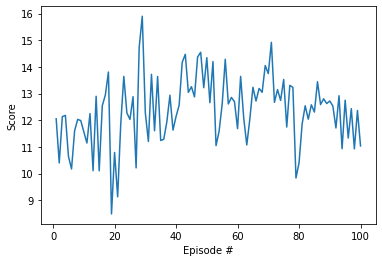

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:

# states, actions, rewards, next_states, dones = replay_buff.sample()
# pprint(actions[24])